### Factor Analysis
This notebook illustrates Factor Analysis model and how to use sklearn.FactorAnalysis method to conduct factor analysis on a sample data set.

In [190]:
import numpy as np
import csv
from scipy.stats import norm
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import scipy.stats.mstats as ms
import mpld3
from mpld3 import plugins
%matplotlib inline

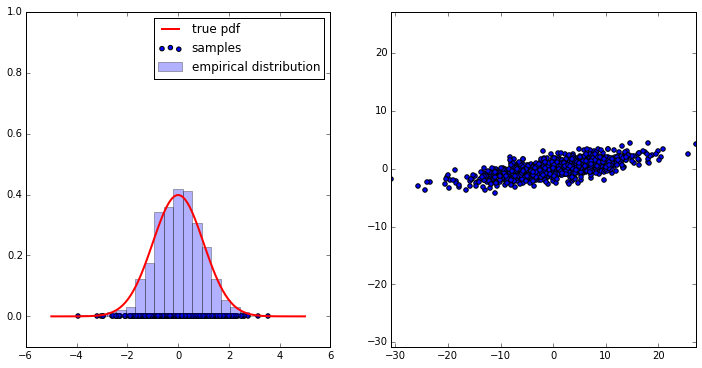

In [196]:
# set the factor analysis model parameters
mu0 = 0
sigma0 = 1
W = np.array([8,1])
W = W[:,np.newaxis]
mu = np.array([0,0])
mu = mu[:,np.newaxis]
Psi = np.array([[1,0],[0,1]])

n = 1000
# sample z's from the distribution 
Z = norm(mu0, sigma0).rvs(n)
Z = Z[:,np.newaxis]
# generate x from z
X = []
for z in Z:
    mu1 = z*W + mu
    x = np.random.multivariate_normal(mu1.flatten(),Psi,1).flatten()
    X.append(x)
X = np.array(X)

# plot them side by side
fig, axs = plt.subplots(1, 2)
fig.set_size_inches([12,6])

P = np.zeros([4,n])
P[0] = Z.flatten()
P[2] = X[:,0]
P[3] = X[:,1]
x = np.linspace(-5,5,100)
axs[0].plot(x, 1/(sigma0 * np.sqrt(2 * np.pi)) * np.exp( - (x - mu0)**2 / (2 * sigma0**2) ), linewidth=2, color='r')
if n > 10:
    axs[0].hist(Z,alpha=0.3,bins=20,color='b',normed=True)
axs[0].scatter(P[0],P[1])
axs[1].scatter(P[2],P[3])
axs[0].set_ylim([-0.1,1])
if n > 1:
    axs[1].set_xlim([np.min(X),np.max(X)])
    axs[1].set_ylim([np.min(X),np.max(X)])
axs[0].legend(['true pdf','samples','empirical distribution'])

### Analyzing data using Factor Analysis model

In [199]:
# Load data
X = np.zeros((387,11))
names = []
with open('../data/04cars.dat','r') as f:
    reader = csv.reader(f)
    l1 = reader.next()
    lind = 0
    for row in reader:
        names.append(row[0])
        X[lind,:] = row[8:]
        lind = lind + 1
# variable names
l = l1[8:]

In [207]:
# Setup the factor analysis model
fa = FactorAnalysis(n_components=2)
# fit the data
zX = ms.zscore(X)
f = fa.fit(zX)
W = ms.zscore(np.transpose(f.components_))
Psi = f.noise_variance_

In [203]:
# We first visualize and interpret the W matrix
fig = plt.figure(figsize=[10,8])
for i in range(W.shape[0]):
    plt.plot([0,W[i,0]],[0,W[i,1]])
    plt.text(W[i,0],W[i,1],l[i])
mpld3.display(fig)

In [206]:
# Find latent scores for each data point using the latent factors
Z = f.fit_transform(zX)
fig = plt.figure(figsize=[12,10])
#for i in range(W.shape[0]):
#    plt.plot([0,W[i,0]],[0,W[i,1]])

scatter = plt.scatter(Z[:,0],Z[:,1])
#for i in range(Z.shape[0]):
    #if abs(Z[i,0]) > 1.5 or abs(Z[i,1]) > 1.5:
    #plt.text(Z[i,0],Z[i,1],names[i],fontsize=8)
    
labels1 = ['%s'%(names[i]) for i in range(Z.shape[0])]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels1)
mpld3.plugins.connect(fig, tooltip)
mpld3.display(fig)

